In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
table = [
    [ 0,  0,  1,  2,  3,  4,  5,  6],
    [ 1, 10, 20, 30, 50, 18, 40, 22],
    [ 6,  0,  2,  5, 45, 15, 10, 30],
    [12,  0,  0,  2,  1,  2, 18, 40],
    [20,  0,  0,  0,  0,  3, 15, 30],
    [28,  0,  0,  0,  0,  0,  1, 10],
    [30,  0,  0,  0,  0,  0,  0,  1]
]
ni=[0,0,0,0,0,0,0]
mi=[]
for i in range(1,len(table)):
    mi.append((sum(table[i]))-table[i][0])
    for j in range(1,len(table[i])):
        ni[j-1]+=(table[i][j])

print(ni)

[10, 22, 37, 96, 38, 84, 133]


### За даними кореляцiйної таблицi обчислити умовнi середнi ~yxi (i = 1,…,k ).​
  

In [3]:
yx = []
t_table = [[row[i] for row in table] for i in range(len(table[0]))]

for row in range(1, len(t_table)):
    yxi = 0
    for col in range(1, len(t_table[row])):
        yxi+=t_table[0][col]*t_table[row][col]
    yx.append(yxi/ni[row-1])
    
for i in range(len(yx)): print(f"~yx{i+1} : ", round(yx[i], 3))

~yx1 :  1.0
~yx2 :  1.455
~yx3 :  2.27
~yx4 :  3.458
~yx5 :  5.053
~yx6 :  7.667
~yx7 :  11.97


### Будуємо поле кореляцiї, наносимо точки Mi(xi;yxi), i = 1,…,k 

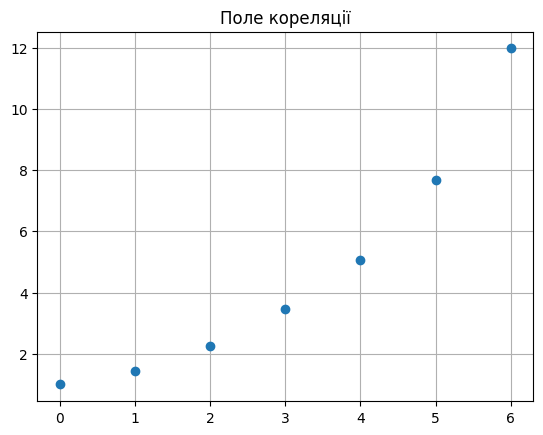

In [4]:
plt.plot(table[0][1:], yx, 'o')  
plt.title('Поле кореляції')
plt.grid(True)  
plt.show()

# Припущення: кореляція показникова 

## Складаємо систему рівнянь для показникової кореляції, розвязуємо і знаходимо невідомі параметри

In [10]:
n = sum(ni)
print(n)
sum_ni_xi = 0
sum_ni_xi2 = 0
sum_ni_lgy = 0
sum_ni_xi_lgy = 0
for i in range(len(ni)):
    sum_ni_xi += ni[i] * table[0][i+1]
    sum_ni_xi2 += ni[i] * (table[0][i+1] ** 2)
    sum_ni_lgy += ni[i] * np.log10(yx[i])
    sum_ni_xi_lgy += ni[i] * table[0][i+1] * np.log10(yx[i])
    
a_matrix = np.array([[sum_ni_xi, n],[sum_ni_xi2, sum_ni_xi]])
b_vector = np.array([sum_ni_lgy,sum_ni_xi_lgy])

result = np.linalg.solve(a_matrix, b_vector)
lg_a = result[0]
lg_b = result[1]
a = 10 ** lg_a
b = 10 ** lg_b

print(f"Параметри системи \n a = {round(a, 3)}, \n b = {round(b,  3)}")

420
Параметри системи 
 a = 1.514, 
 b = 0.983


## Записати рiвняння кривої регресiї Y на X : yx = f(x) та побудувати її графік.

# y = ba^x

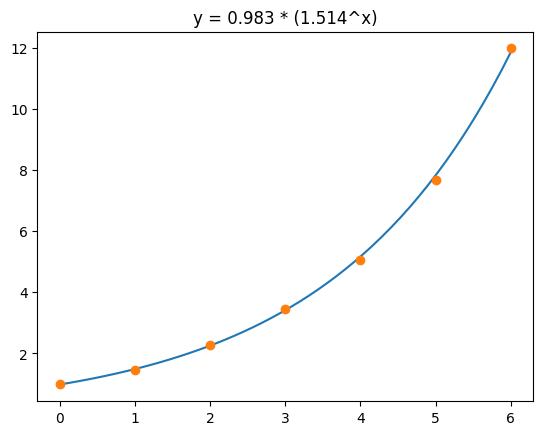

In [6]:
x_values = np.linspace(0, 6)
y_values = b * (a ** x_values)
plt.plot(x_values, y_values, label=f'y = {b} * ({a}^x)')
plt.plot(table[0][1:], yx, 'o', label='Точки')
plt.title(f"y = {round(b, 3)} * ({round(a,3)}^x)")
plt.show()

In [7]:
D = 0
for row in range(1,len(table)):
    for col in range(1,len(table[row])):
        D += table[row][col] * (table[row][0] - (b * (a ** table[0][col]))) ** 2 
print(f"△ = {round(D,3)}")
print(f"σ² = {round(D/sum(ni), 3)}")

△ = 15483.824
σ² = 36.866


In [8]:
sigma = 0
for i in range(len(yx)):
    sigma += ni[i] * (yx[i]-(b * (a ** table[0][i+1])))**2    
print(f"δ² = {round(sigma, 3)}")

δ² = 4.798
